In [25]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [26]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)

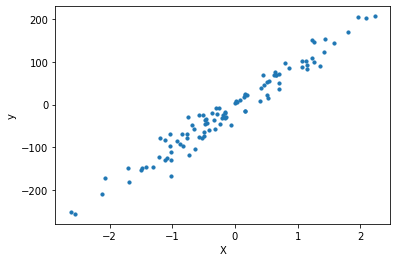

In [27]:
def plt_date(X, y, s=10, xlabel='X', ylabel='y'):
    plt.scatter(X, y, s)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plt_date(X, y)

In [28]:
def shuffle_date(X, y, seed=None):
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_date(X, y, seed)
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]
    
    return X_train, X_test, y_train, y_test  

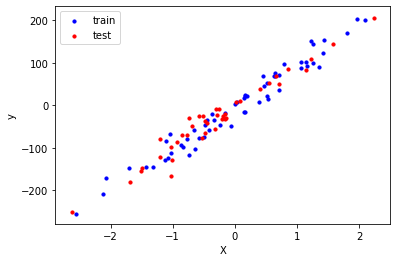

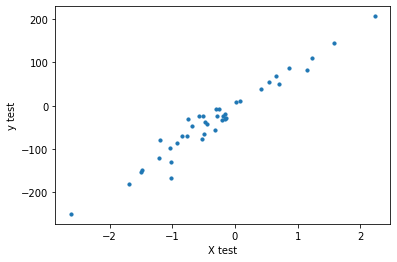

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train, label='train', s=10, color='b')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.scatter(X_test, y_test, label='test', s=10, color='r')
plt.legend()
plt.show()

plt_date(X_test, y_test,xlabel='X test',ylabel='y test')

In [30]:
class LinearRegression:
    def __init__(self, n_iterations=100, learning_rate=0.001, gradient_descent=True):
        self.gradient_descent = gradient_descent
        self.regularization = lambda x: 0
        self.regularization.grad = lambda x: 0
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
    
    def initialize_weights(self, n_features):
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features, ))

    def fit(self, X, y):
        if not self.gradient_descent:
            X = np.insert(X, 0, 1, axis=1)
            U, S, V = np.linalg.svd(X.T.dot(X))
            S = np.diag(S)
            X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
            self.w = X_sq_reg_inv.dot(X.T).dot(y)
        else:
            X = np.insert(X, 0, 1, axis=1)
            self.training_errors = []
            self.initialize_weights(n_features=X.shape[1])
            
            for i in range(self.n_iterations):
                y_pred = X.dot(self.w)
                mse = np.mean(0.5 * (y - y_pred)**2)
                self.training_errors.append(mse)
                grad_w = -(y - y_pred).dot(X)
                self.w -= self.learning_rate * grad_w
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

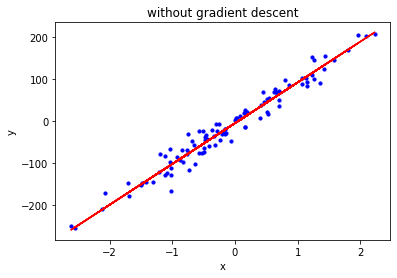

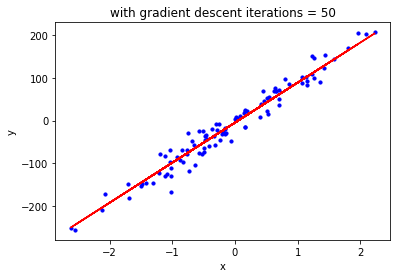

In [31]:
n_samples, n_features = np.shape(X)

model = LinearRegression(n_iterations=50, gradient_descent=False)
model.fit(X_train, y_train)

y_pred = model.predict(X)

plt.scatter(X, y, s=10, color='b')
plt.plot(X, y_pred, color='r')
plt.title('without gradient descent')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

model.gradient_descent=True
model.fit(X_train, y_train)

y_pred = model.predict(X)

plt.scatter(X, y, s=10, color='b')
plt.plot(X, y_pred, color='r')
plt.title('with gradient descent iterations = 50')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

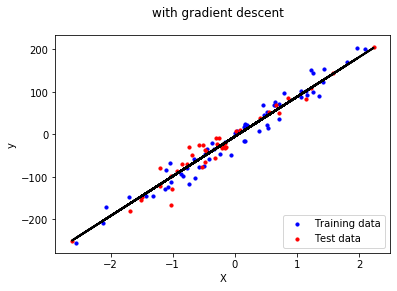

In [32]:
m1 = plt.scatter( X_train, y_train, color='b', s=10)
m2 = plt.scatter( X_test, y_test, color='r', s=10)
plt.plot( X, y_pred, color='black', linewidth=2, label="Prediction")
plt.suptitle("with gradient descent")
plt.xlabel('X')
plt.ylabel('y')
plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()

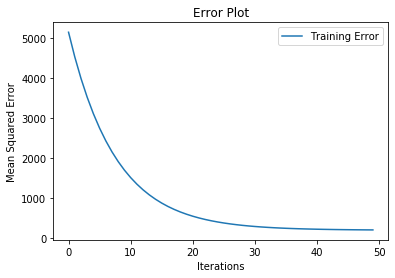

In [33]:
n = len(model.training_errors)
training, = plt.plot(range(n), model.training_errors, label="Training Error")
plt.legend(handles=[training])
plt.title("Error Plot")
plt.ylabel('Mean Squared Error')
plt.xlabel('Iterations')
plt.show()